In [ ]:
import os
os.chdir('..')

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
from utils.time_align import *

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
cities = pd.ExcelFile('./data/数据/实际数据/九地市分用电类别数据(整理版).xlsx').sheet_names

In [5]:
cities

['三明', '南平', '厦门', '宁德', '泉州', '漳州', '福州', '莆田', '龙岩']

In [ ]:
city = '厦门'

In [7]:
data = pd.read_excel('./data/数据/实际数据/九地市分用电类别数据(整理版).xlsx', sheet_name=city)

In [8]:
features = data.columns[1:9]

In [9]:
feature = '大工业'

In [10]:
data1 = data[['日期', feature, '疫情']]
data1.columns = ['timestamp', 'feature1', 'label']
valid_raws = data1.index[~(data1.isna().iloc[:,-1] | data1.isna().iloc[:,1] | data1.isna().iloc[:,0])]
data1 = data1.loc[valid_raws]
data1.iloc[:,0] = data1.iloc[:,0].view('int64')
train_data = data1.iloc[:,:2]
gt = data1.iloc[:, [0,-1]]

In [11]:
sf1 = '2019-02-05'
sf2 = '2020-01-25'
sf3 = '2021-02-11'
sf4 = '2022-01-31'

In [16]:
plt.rcParams['font.size'] = 30
plt.rcParams['pdf.fonttype'] = 42

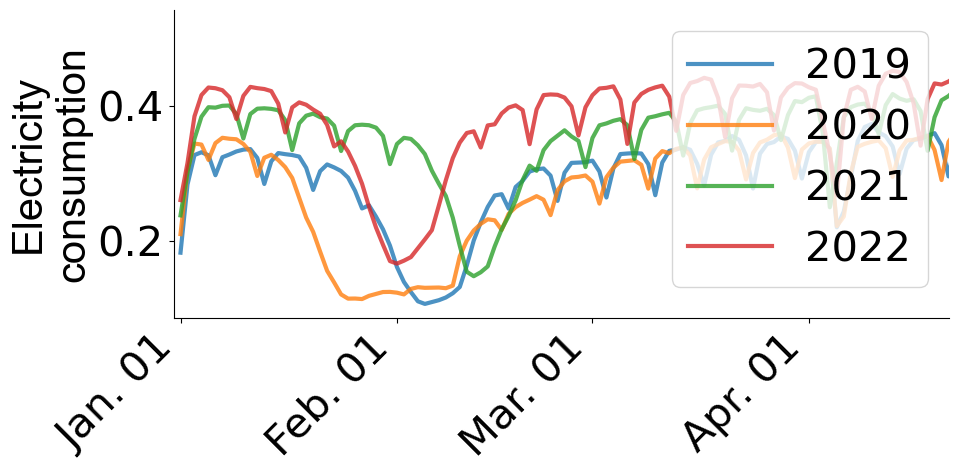

In [43]:
fig, ax = plt.subplots(figsize=(10, 4))
ind = 0
feature = '大工业'
# for ind, feature in enumerate(features):
data1 = data[['日期', feature, '疫情']]
data1.columns = ['timestamp', 'feature1', 'label']
valid_raws = data1.index[~(data1.isna().iloc[:,-1] | data1.isna().iloc[:,1] | data1.isna().iloc[:,0])]
data1 = data1.loc[valid_raws]
data1.iloc[:,0] = data1.iloc[:,0].view('int64')
train_data = data1.iloc[:,:2]
gt = data1.iloc[:, [0,-1]]

years = np.array([i.year for i in pd.to_datetime(data1.iloc[:,0])])
ts1 = data1[years==2019]
ts2 = data1[years==2020]
ts3 = data1[years==2021]
ts4 = data1[years==2022]
tss = [ts1,ts2,ts3,ts4]


yrs = '2019,2020,2021,2022'.split(',')
clists = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for i, t_rescale in enumerate(tss):
    ax.plot(t_rescale['feature1'].to_numpy(), label=yrs[i], c=clists[i], alpha=0.8, lw=3)
    # ax.plot(t_rescale['feature1'].to_numpy()+0.5-t_rescale['feature1'].to_numpy().mean(), '.-', label=yrs[i])
ax.legend(loc=1)
feature = re.sub(' .+\.', '',feature)
# ax.set_title('Industry', font='Arial')
# x_ticks = tss[0]
# x_ticklabels = [i[5:] for i in special_days]
special_days = ['2019-01-01', '2019-02-01','2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', ]
x_ticks = tss[0].index[np.isin(tss[0]['timestamp'], pd.to_datetime(special_days).view('int64'))].to_numpy()
ylims = ax.get_ylim()
# ax[ind//2][ind%2].vlines(x_ticks, *ylims, ls='--', color='k', alpha=0.7)
ax.set_ylim(ylims)
# 2].set_xticklabels([i[-5:] for i in pd.to_datetime(tss[0]['timestamp']).astype(str)])
month_abbr = {'01-':'Jan.', '02-':'Feb.', '03-':'Mar.', '04-':'Apr.', '05-':'May', '06-':'June',
                  '07-':'July', '08-':'Aug.', '09-':'Sept.', '10-':'Oct.', '11-':'Nov.', '12-':'Dec.'}
month_transform = lambda x: month_abbr[x[:3]]+' '+x[3:]
ax.set_xticks(ticks=x_ticks, labels=[month_transform(i[-5:]) for i in special_days])
ax.set_ylabel('Electricity\nconsumption',font='Arial')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(-1, 110)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right') 
# plt.savefig('Xiamen_industry_notalign.png', dpi=300)

In [ ]:
tss_new[0].index[np.isin(tss_new[0]['timestamp'], pd.to_datetime(special_days).view('int64'))].to_numpy()

In [17]:
features = ['大工业', '居民', '农业', '非居照', '非普', '商业']

In [39]:
feature_eng = {'大工业':'Industry', 
               '居民':'Residential living', 
               '农业':'Agricultural electricity', 
               '非居照':'Non-residential lighting', 
               '非普':'Non-general industry', 
               '商业':'Commercial electricity'}

In [48]:
plt.rcParams['font.size'] = 30

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


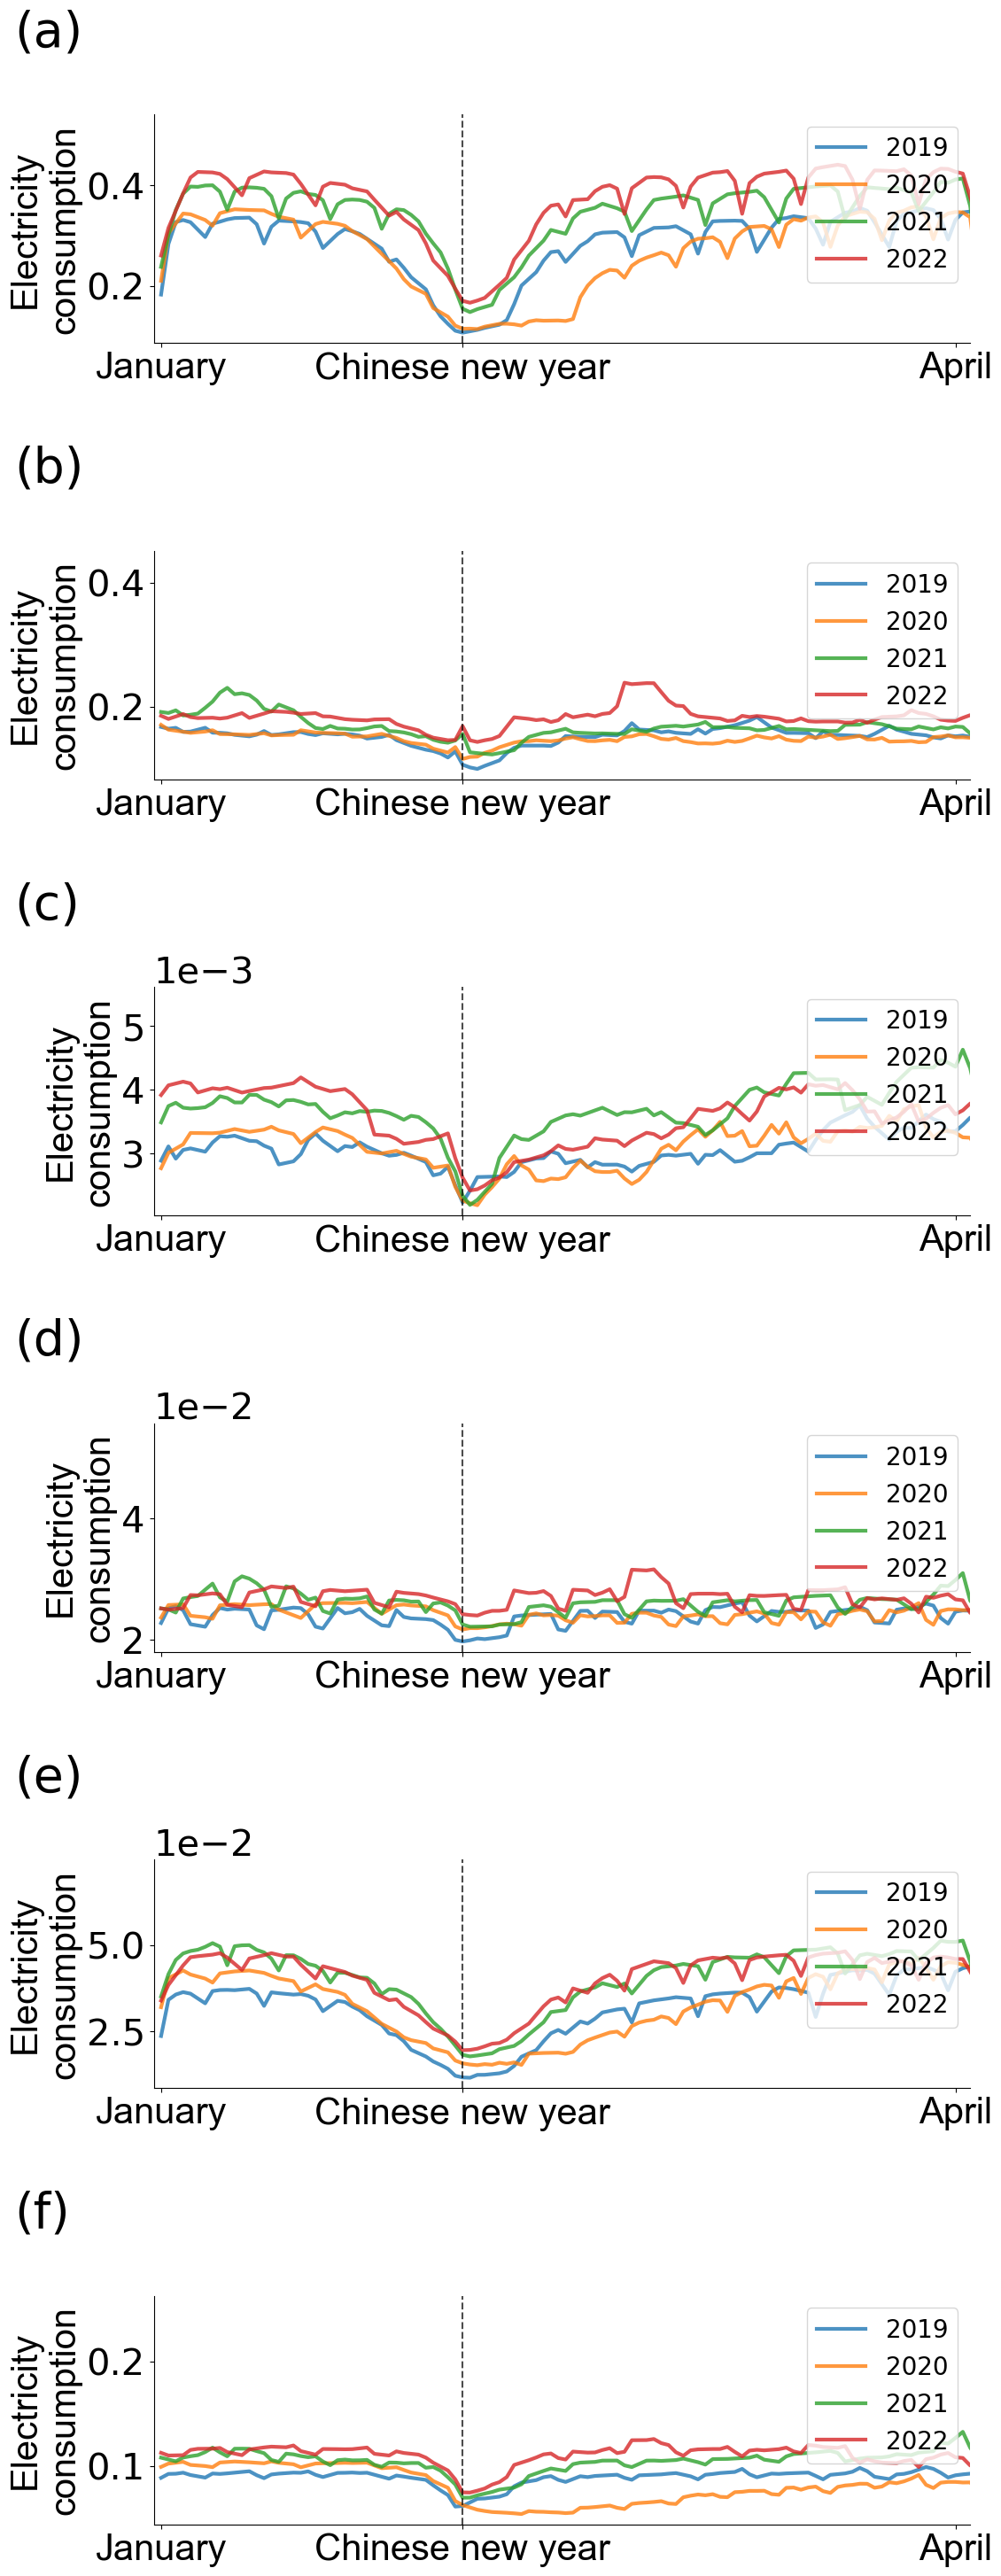

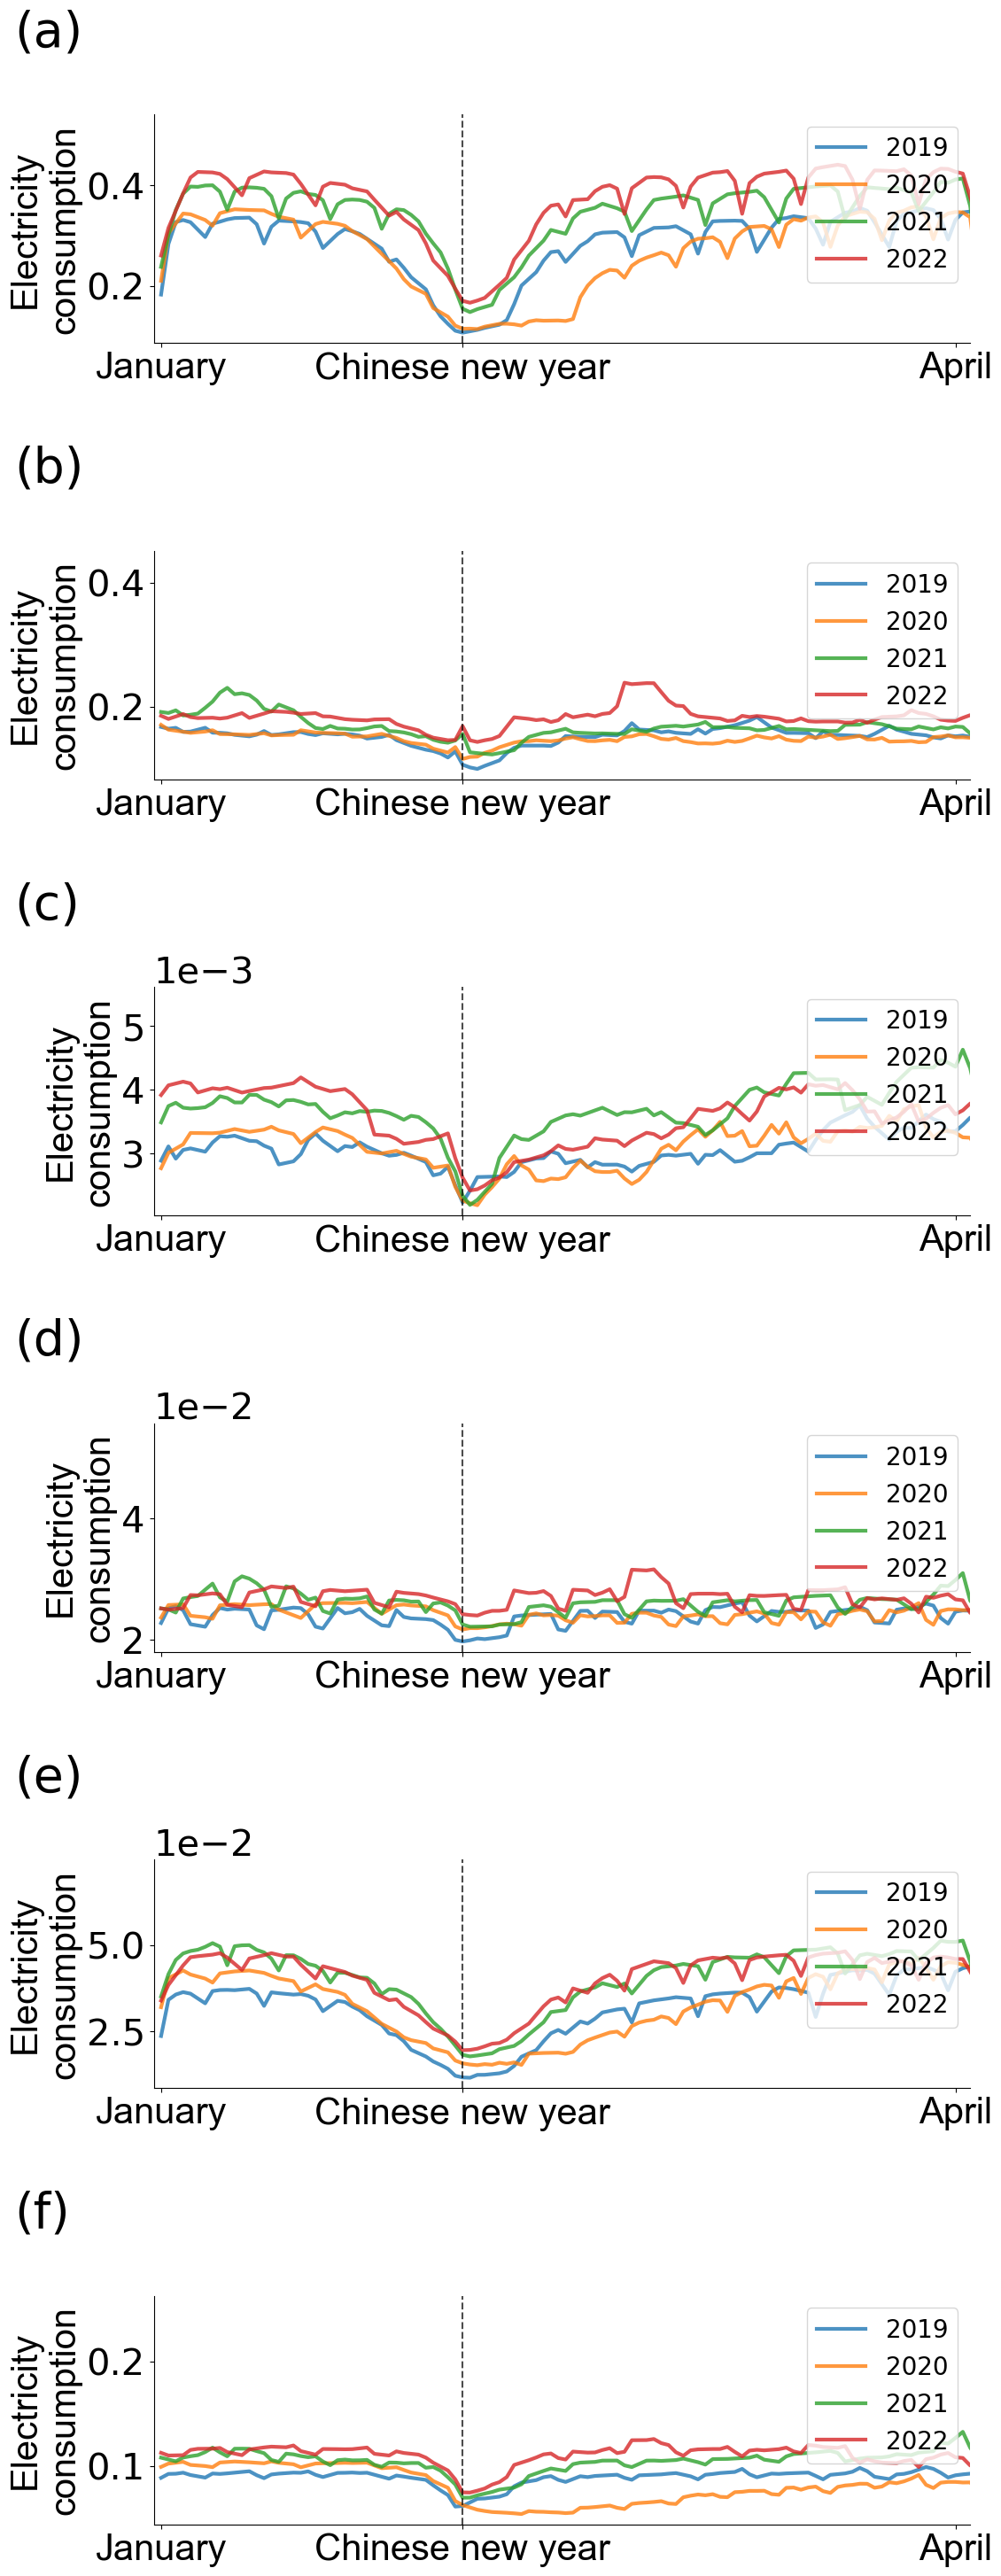

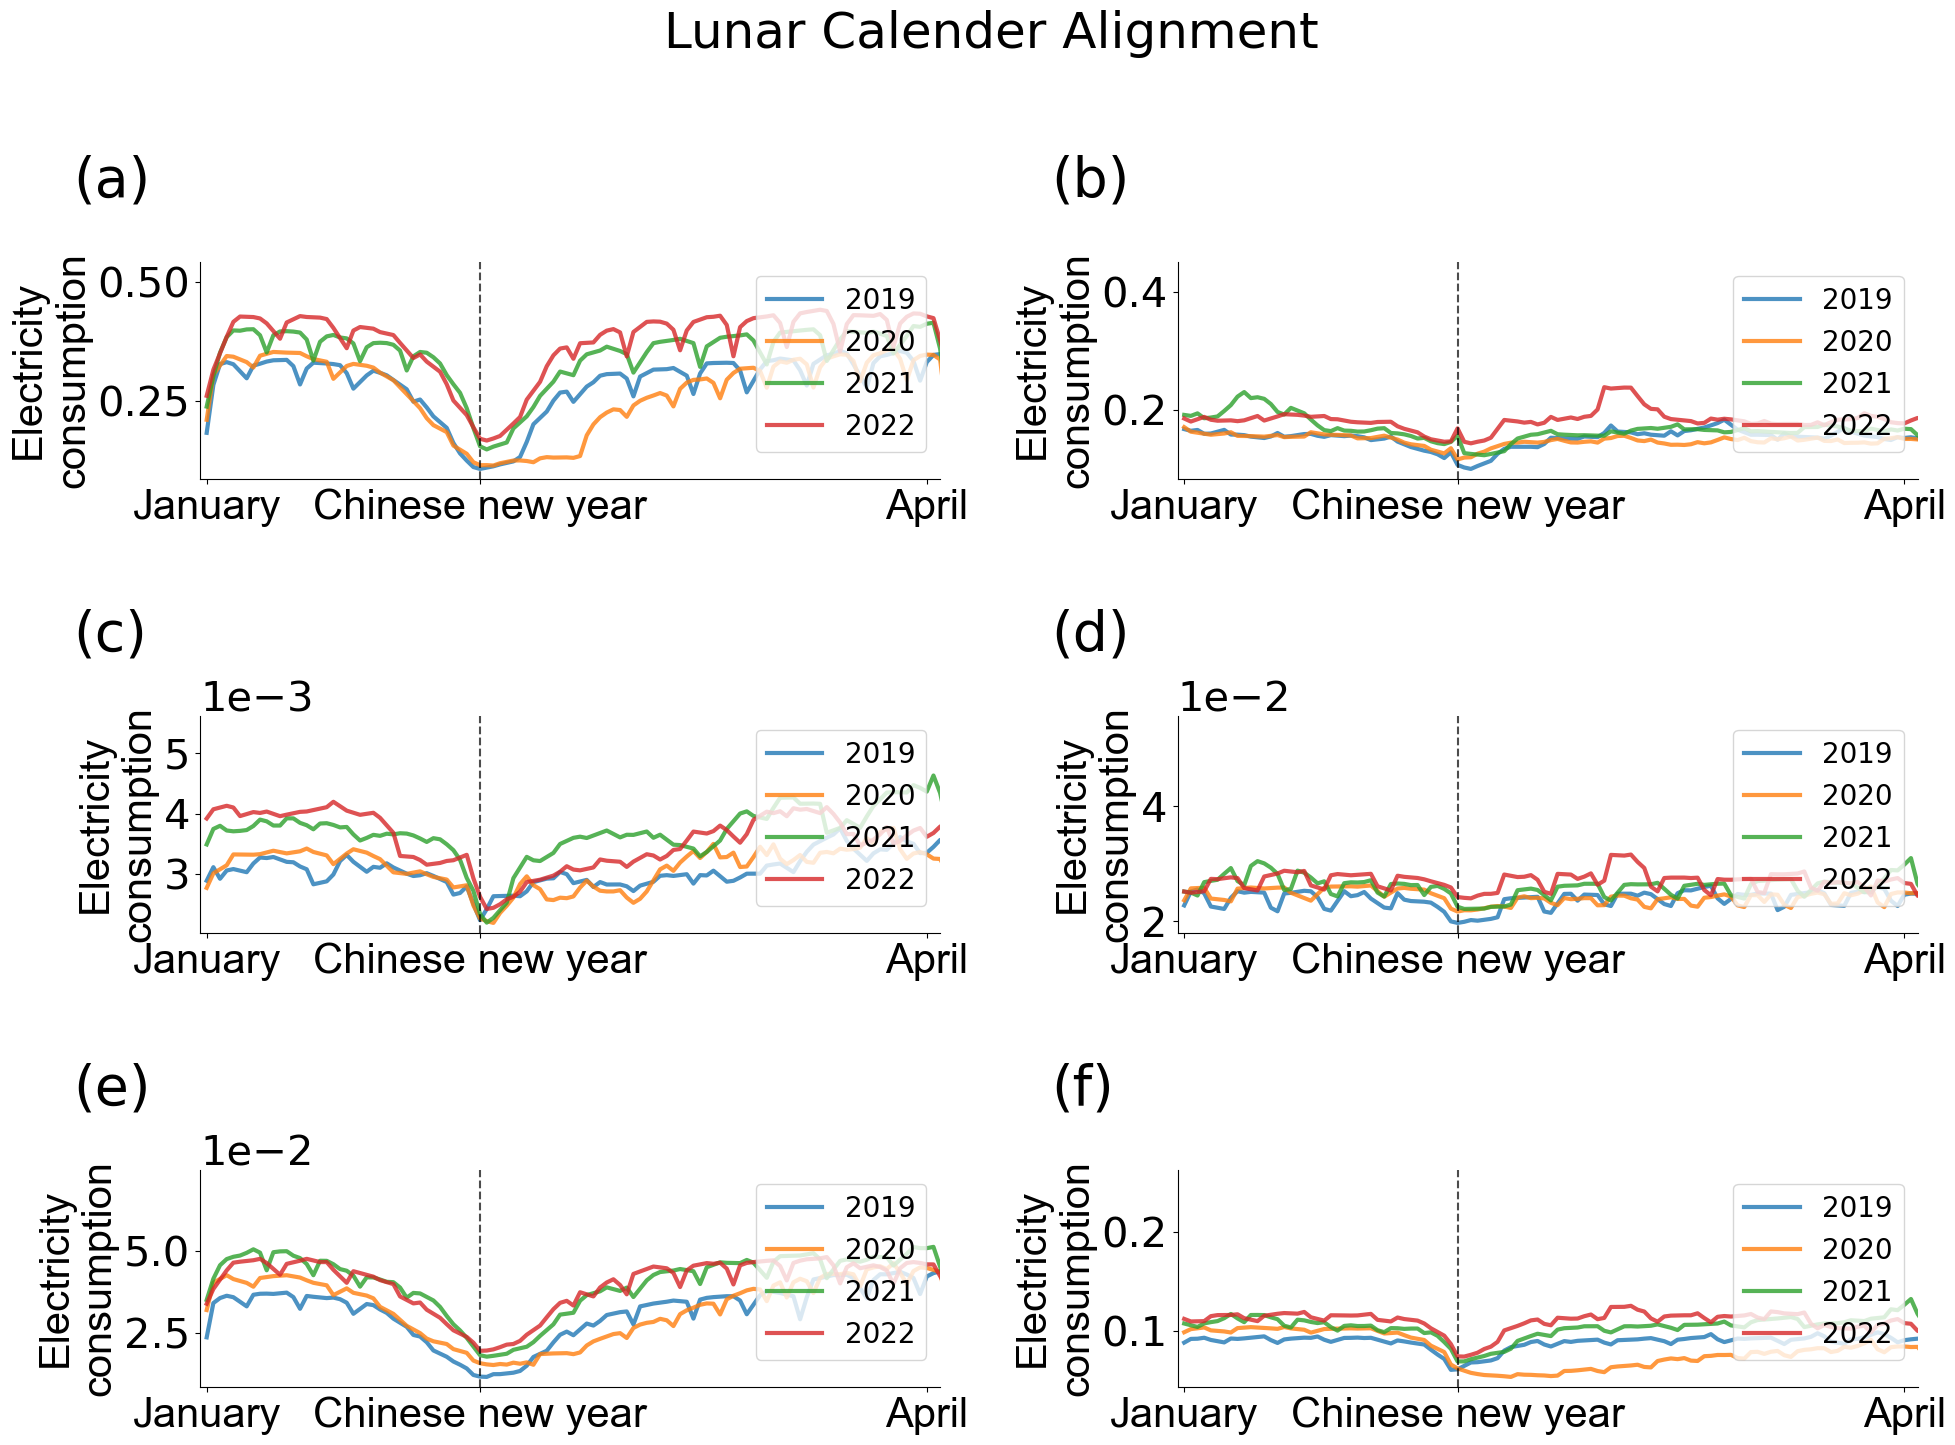

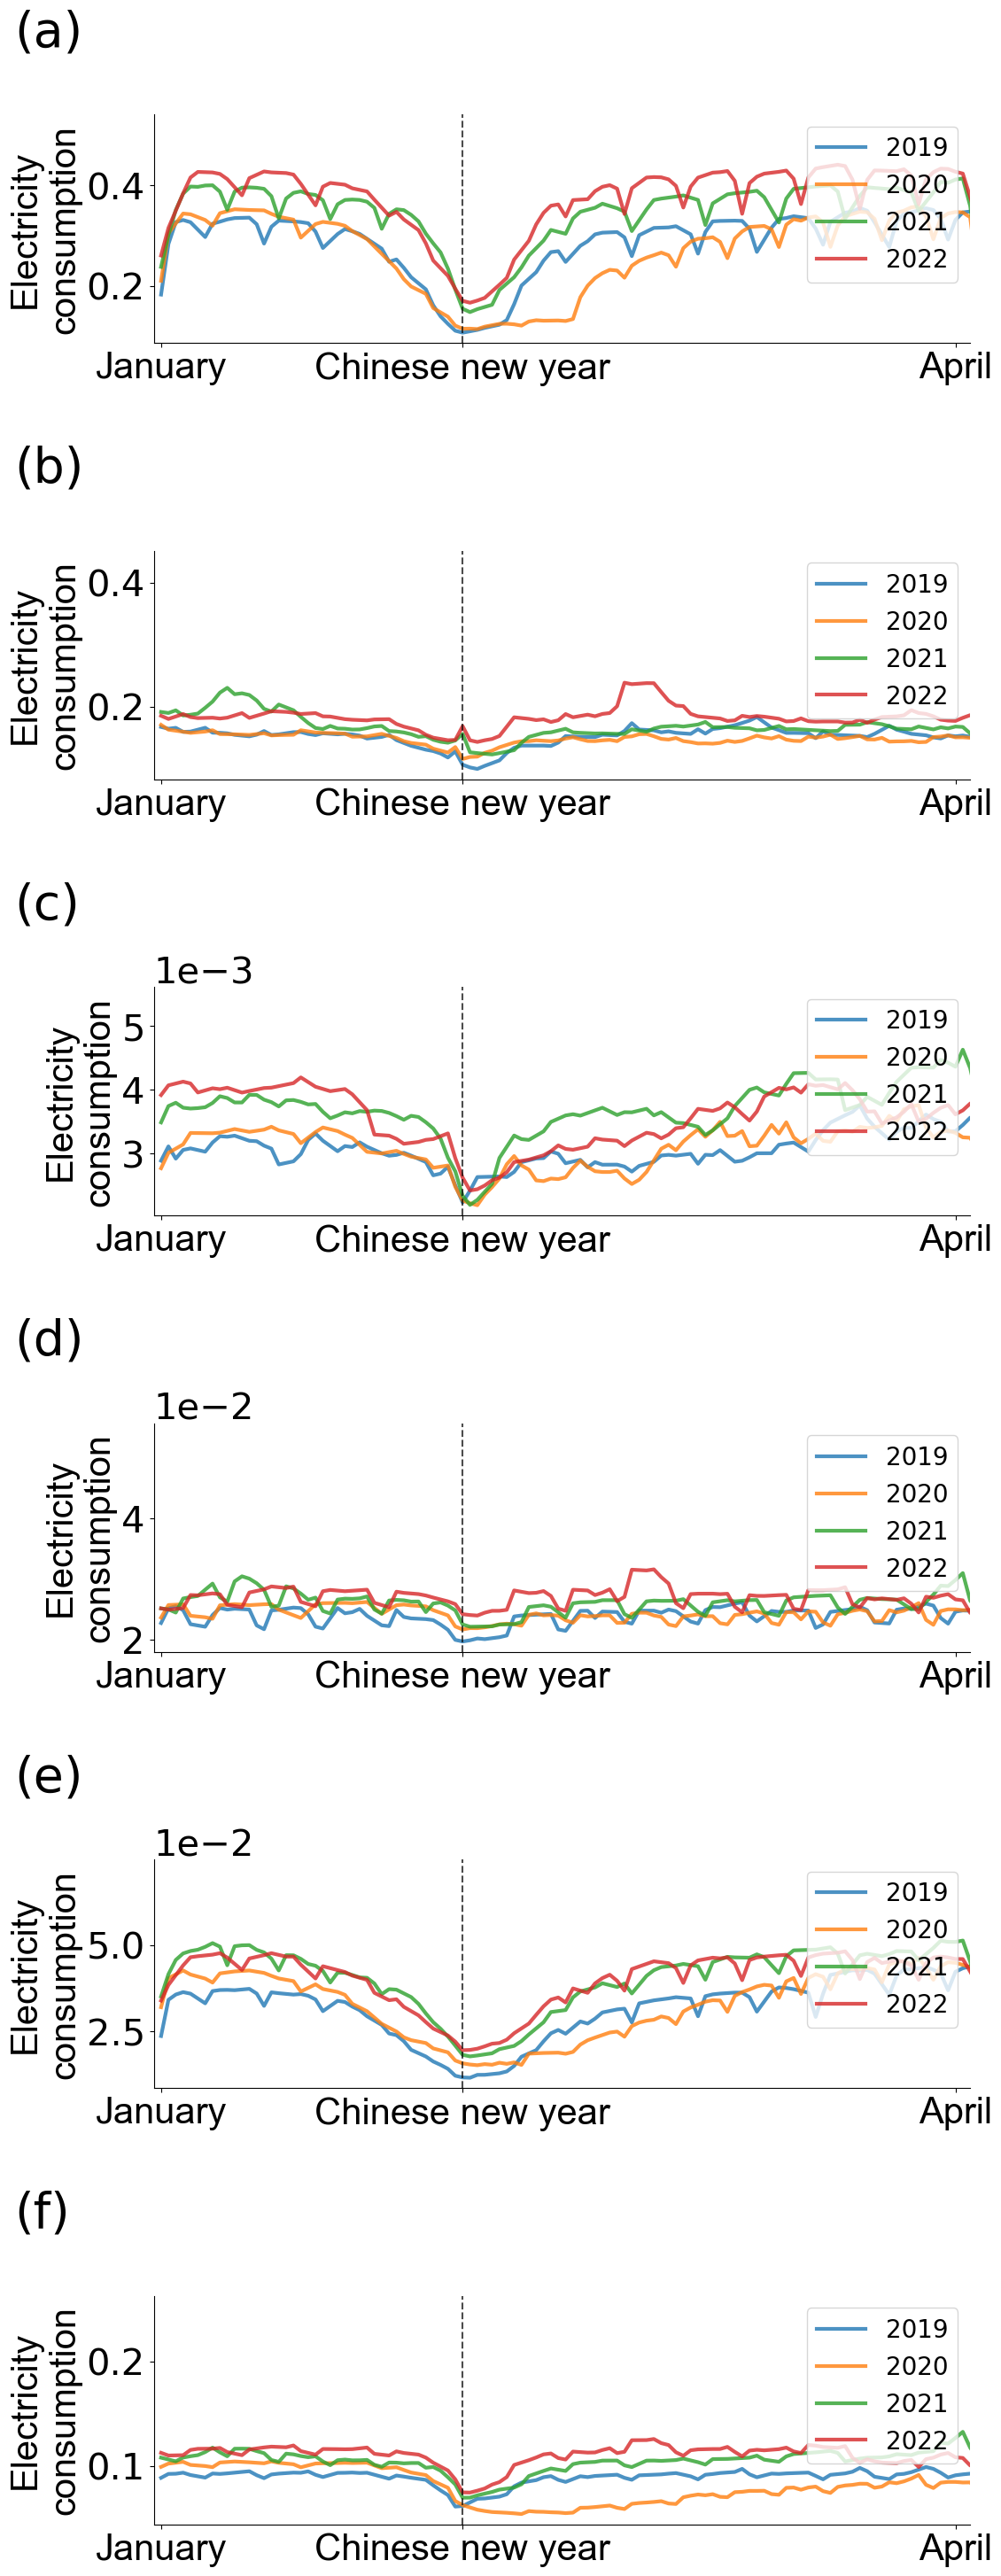

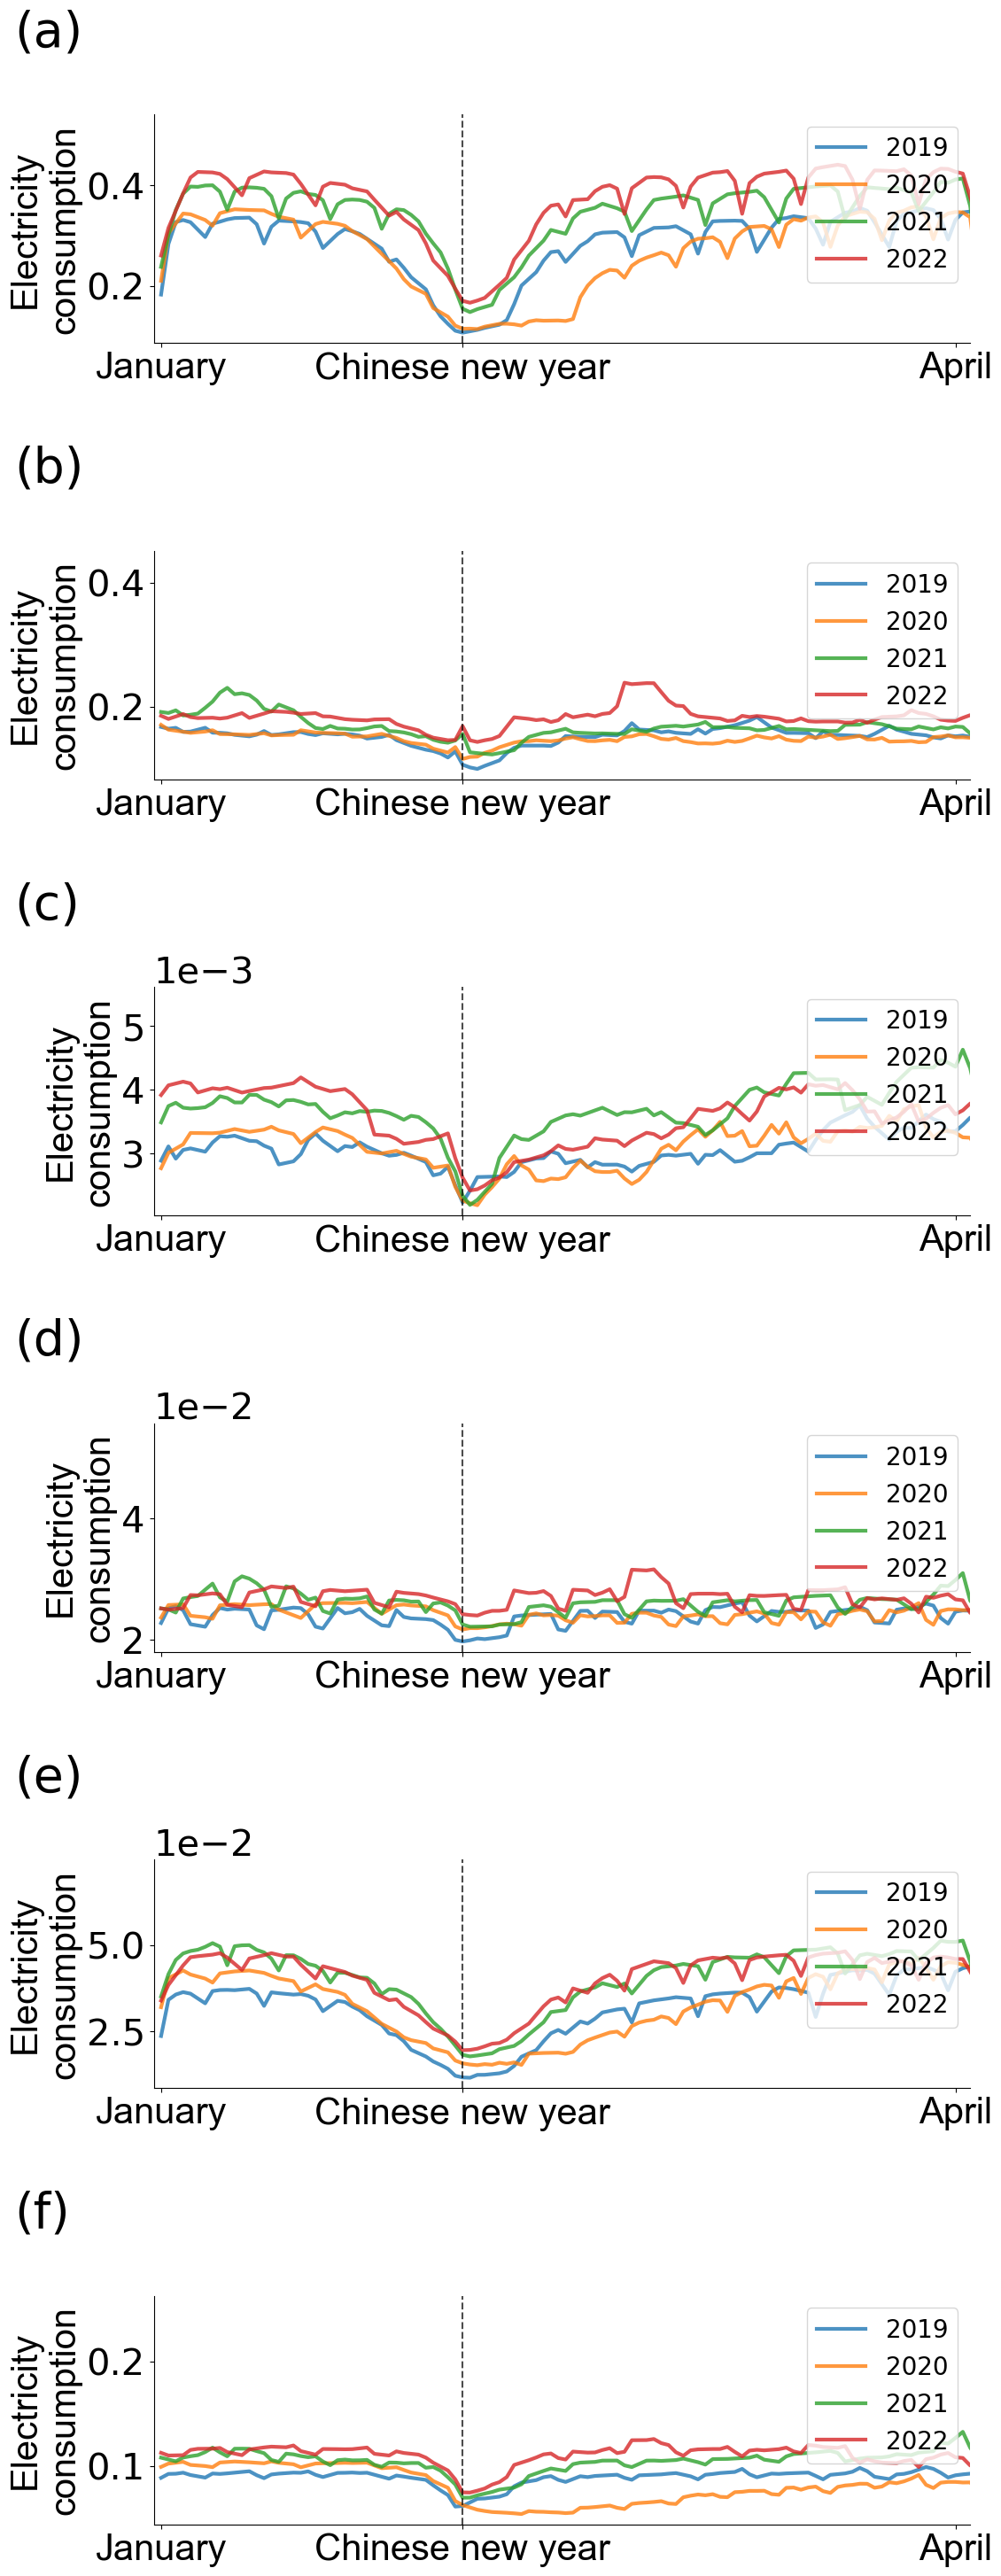

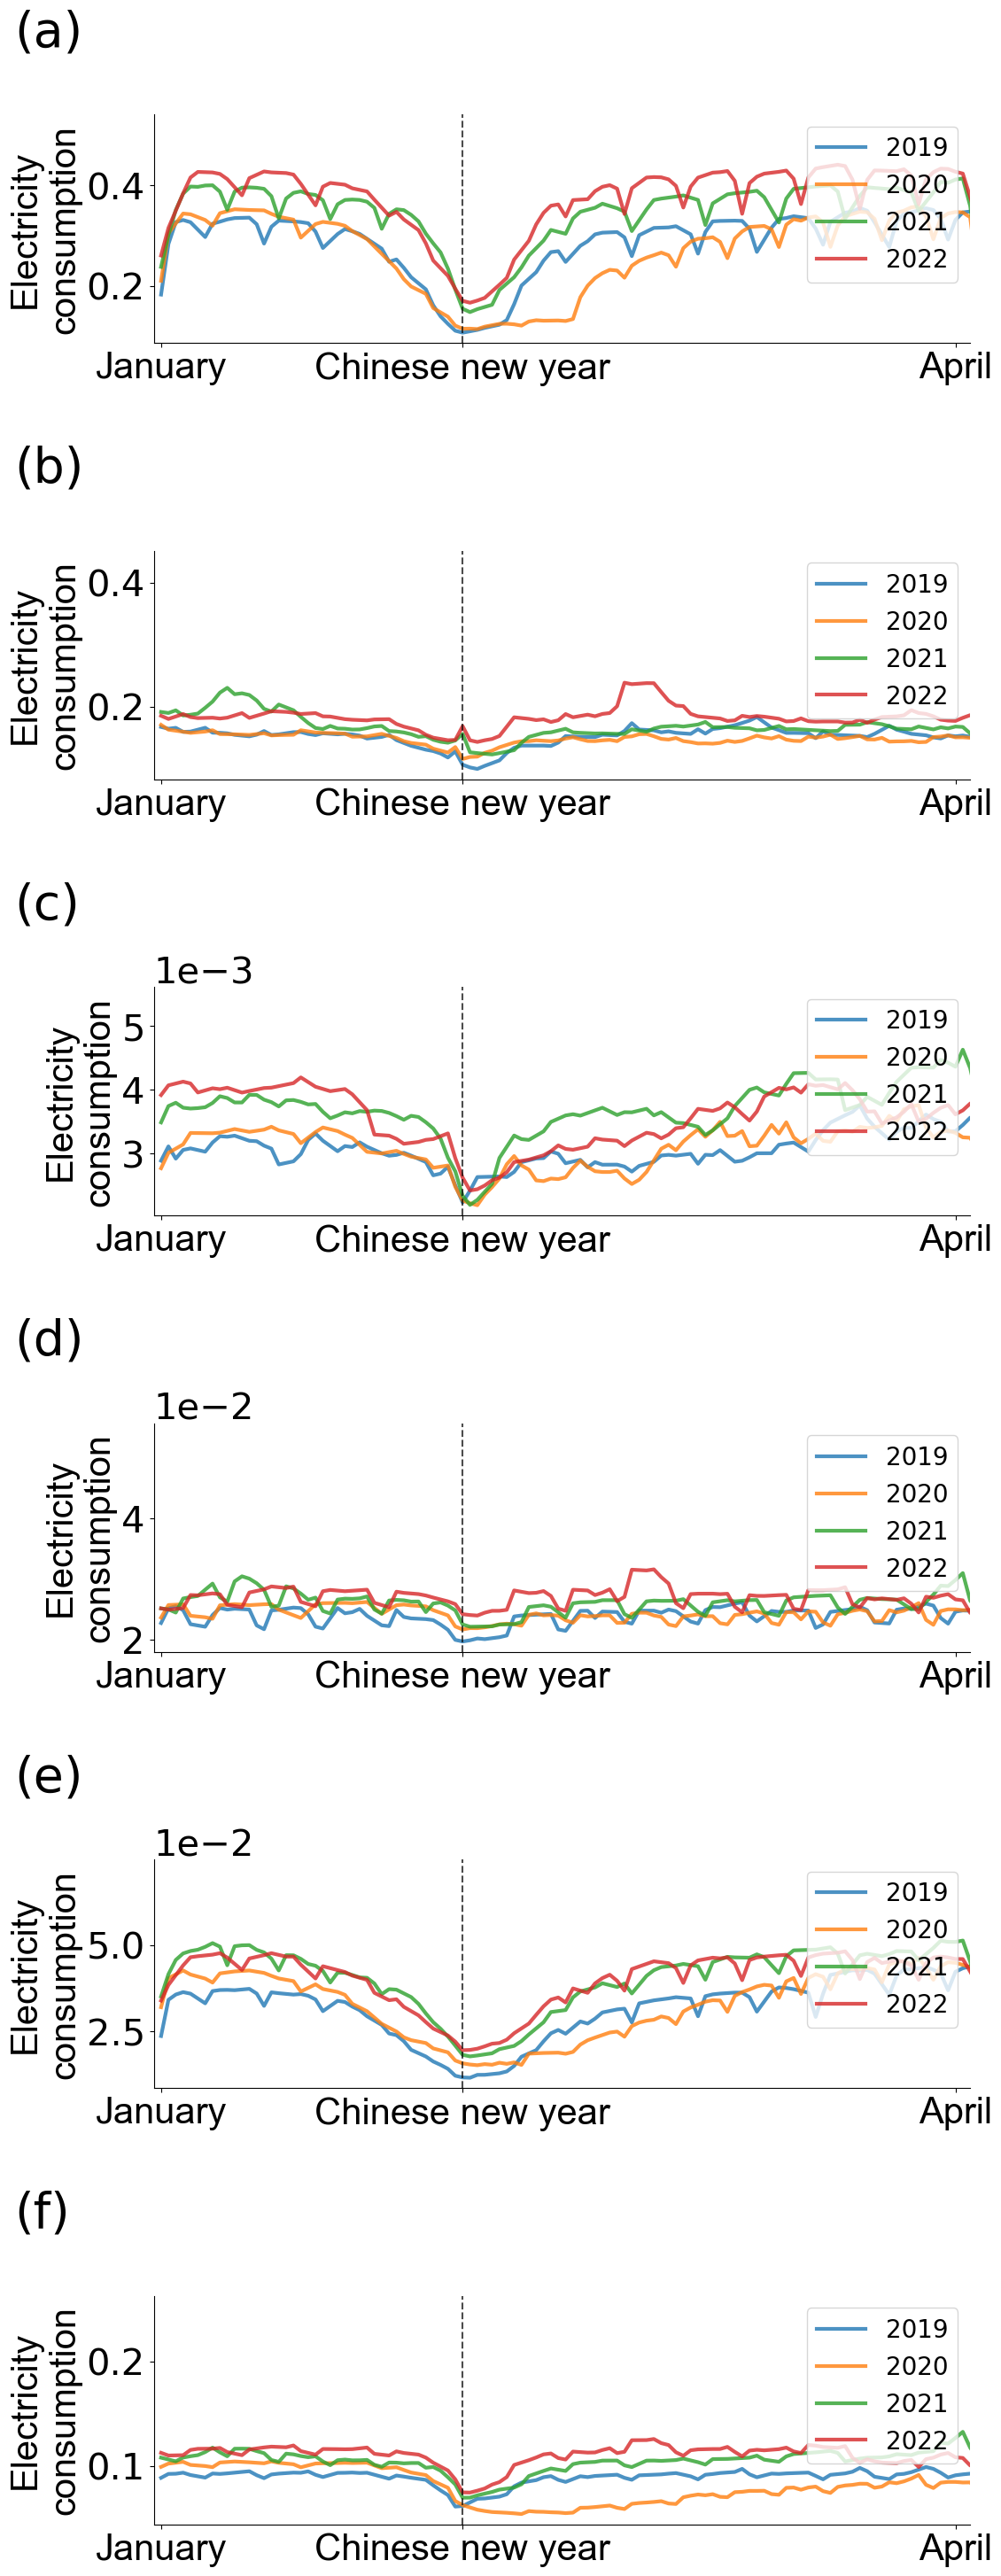

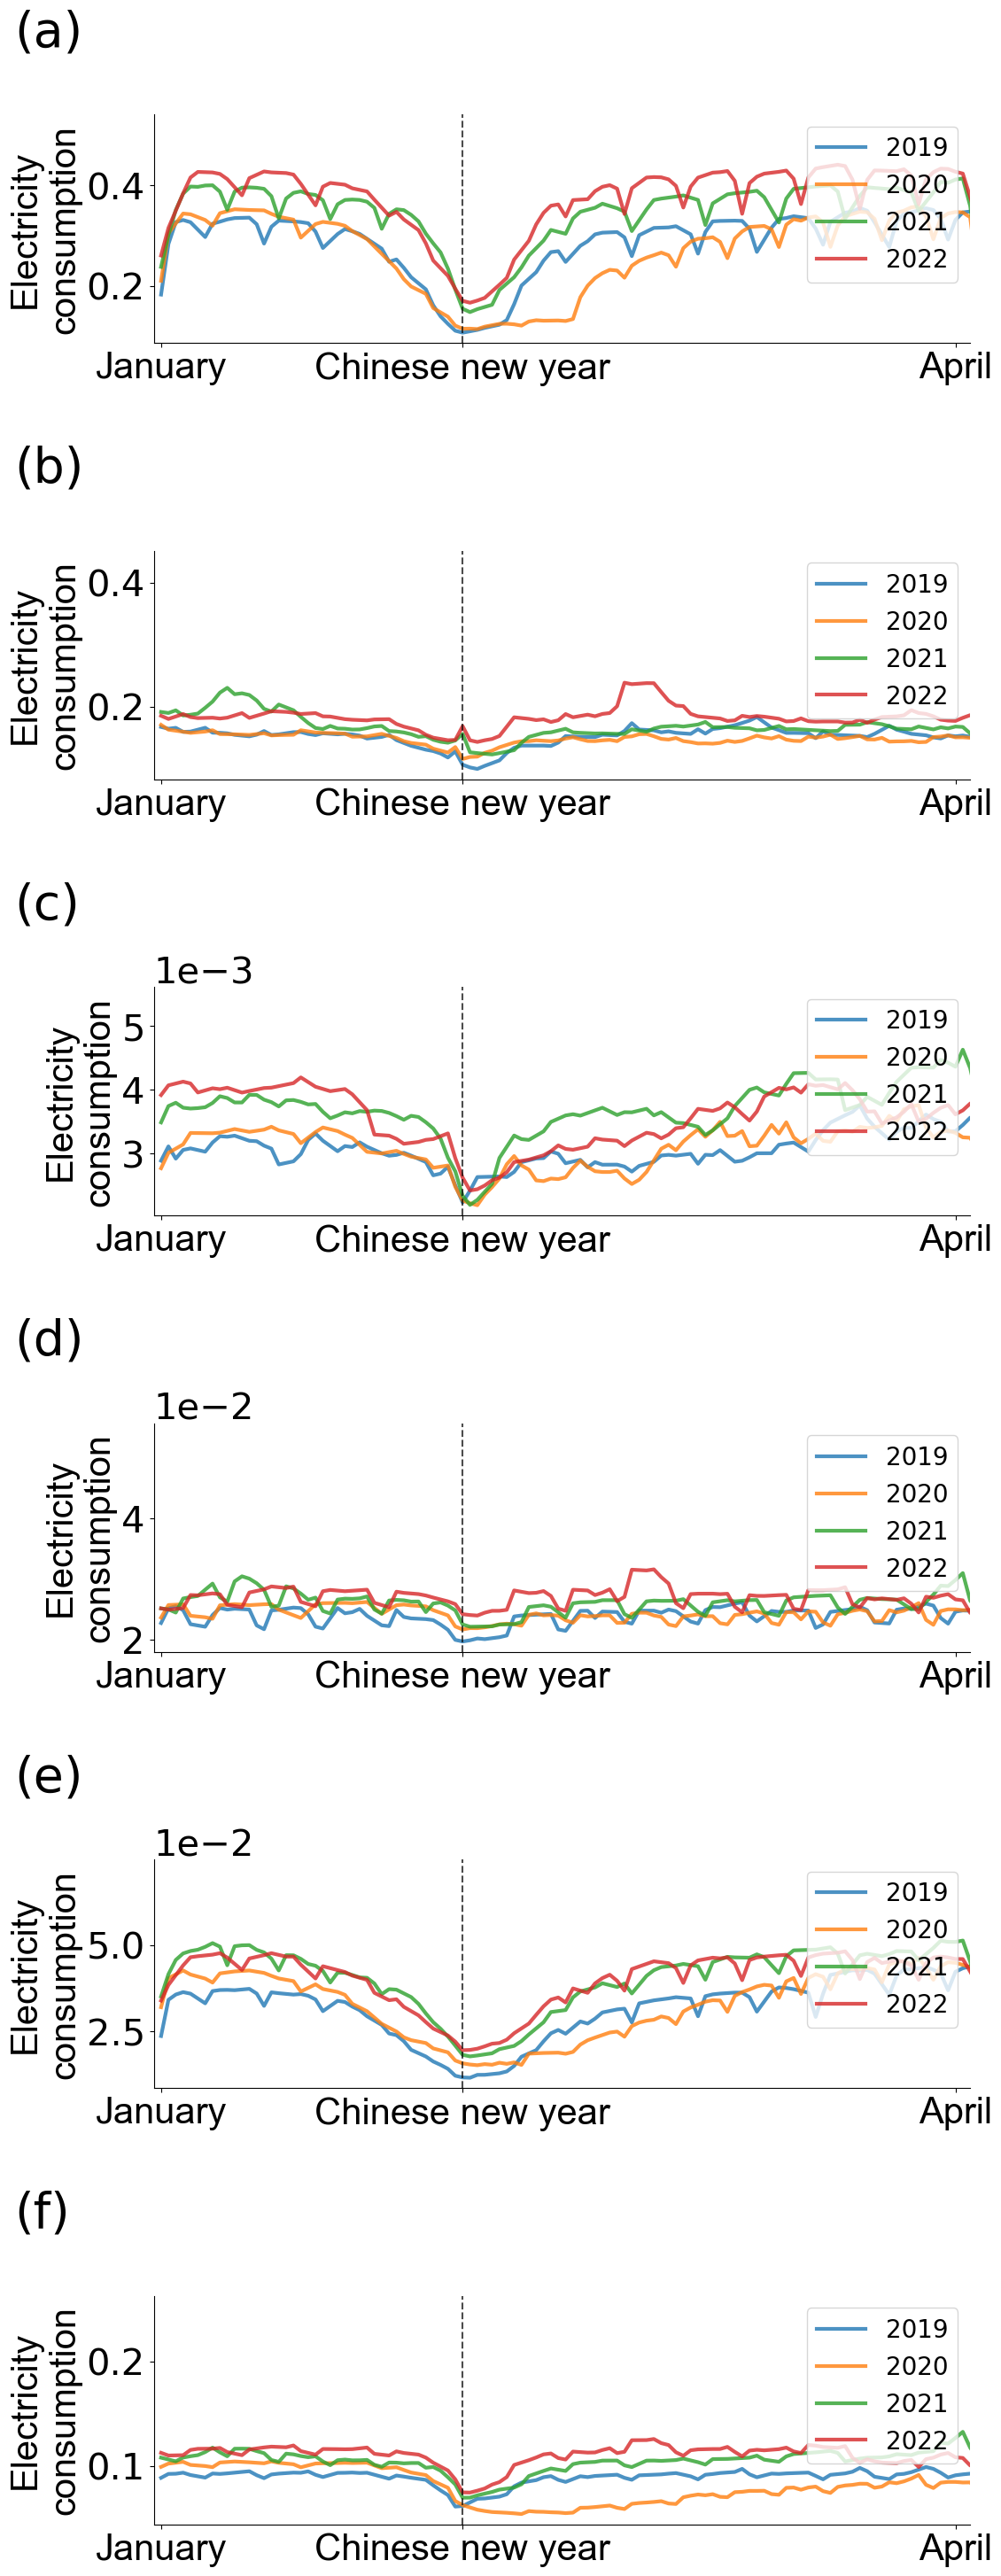

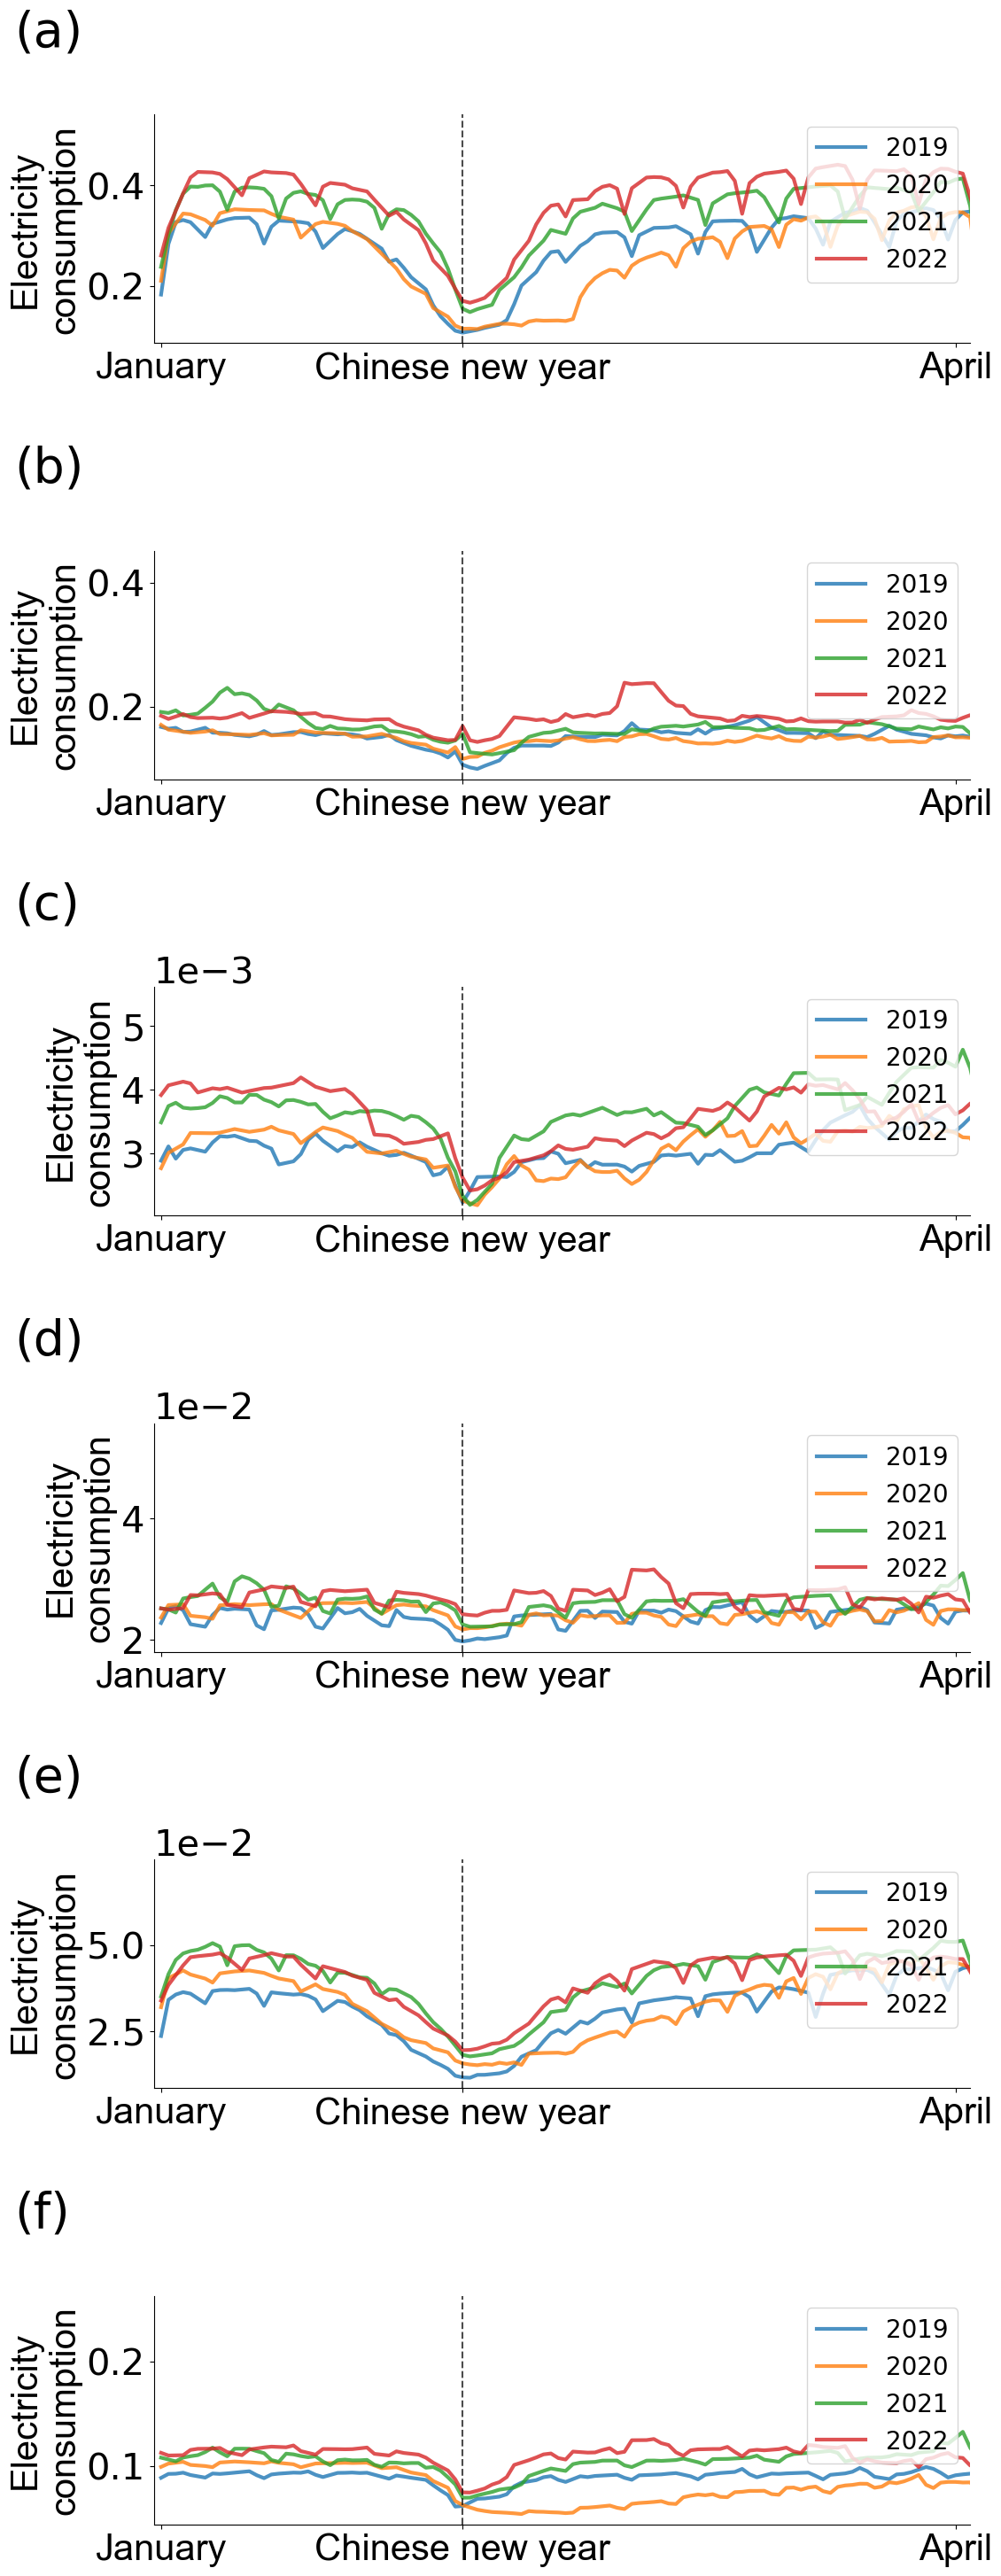

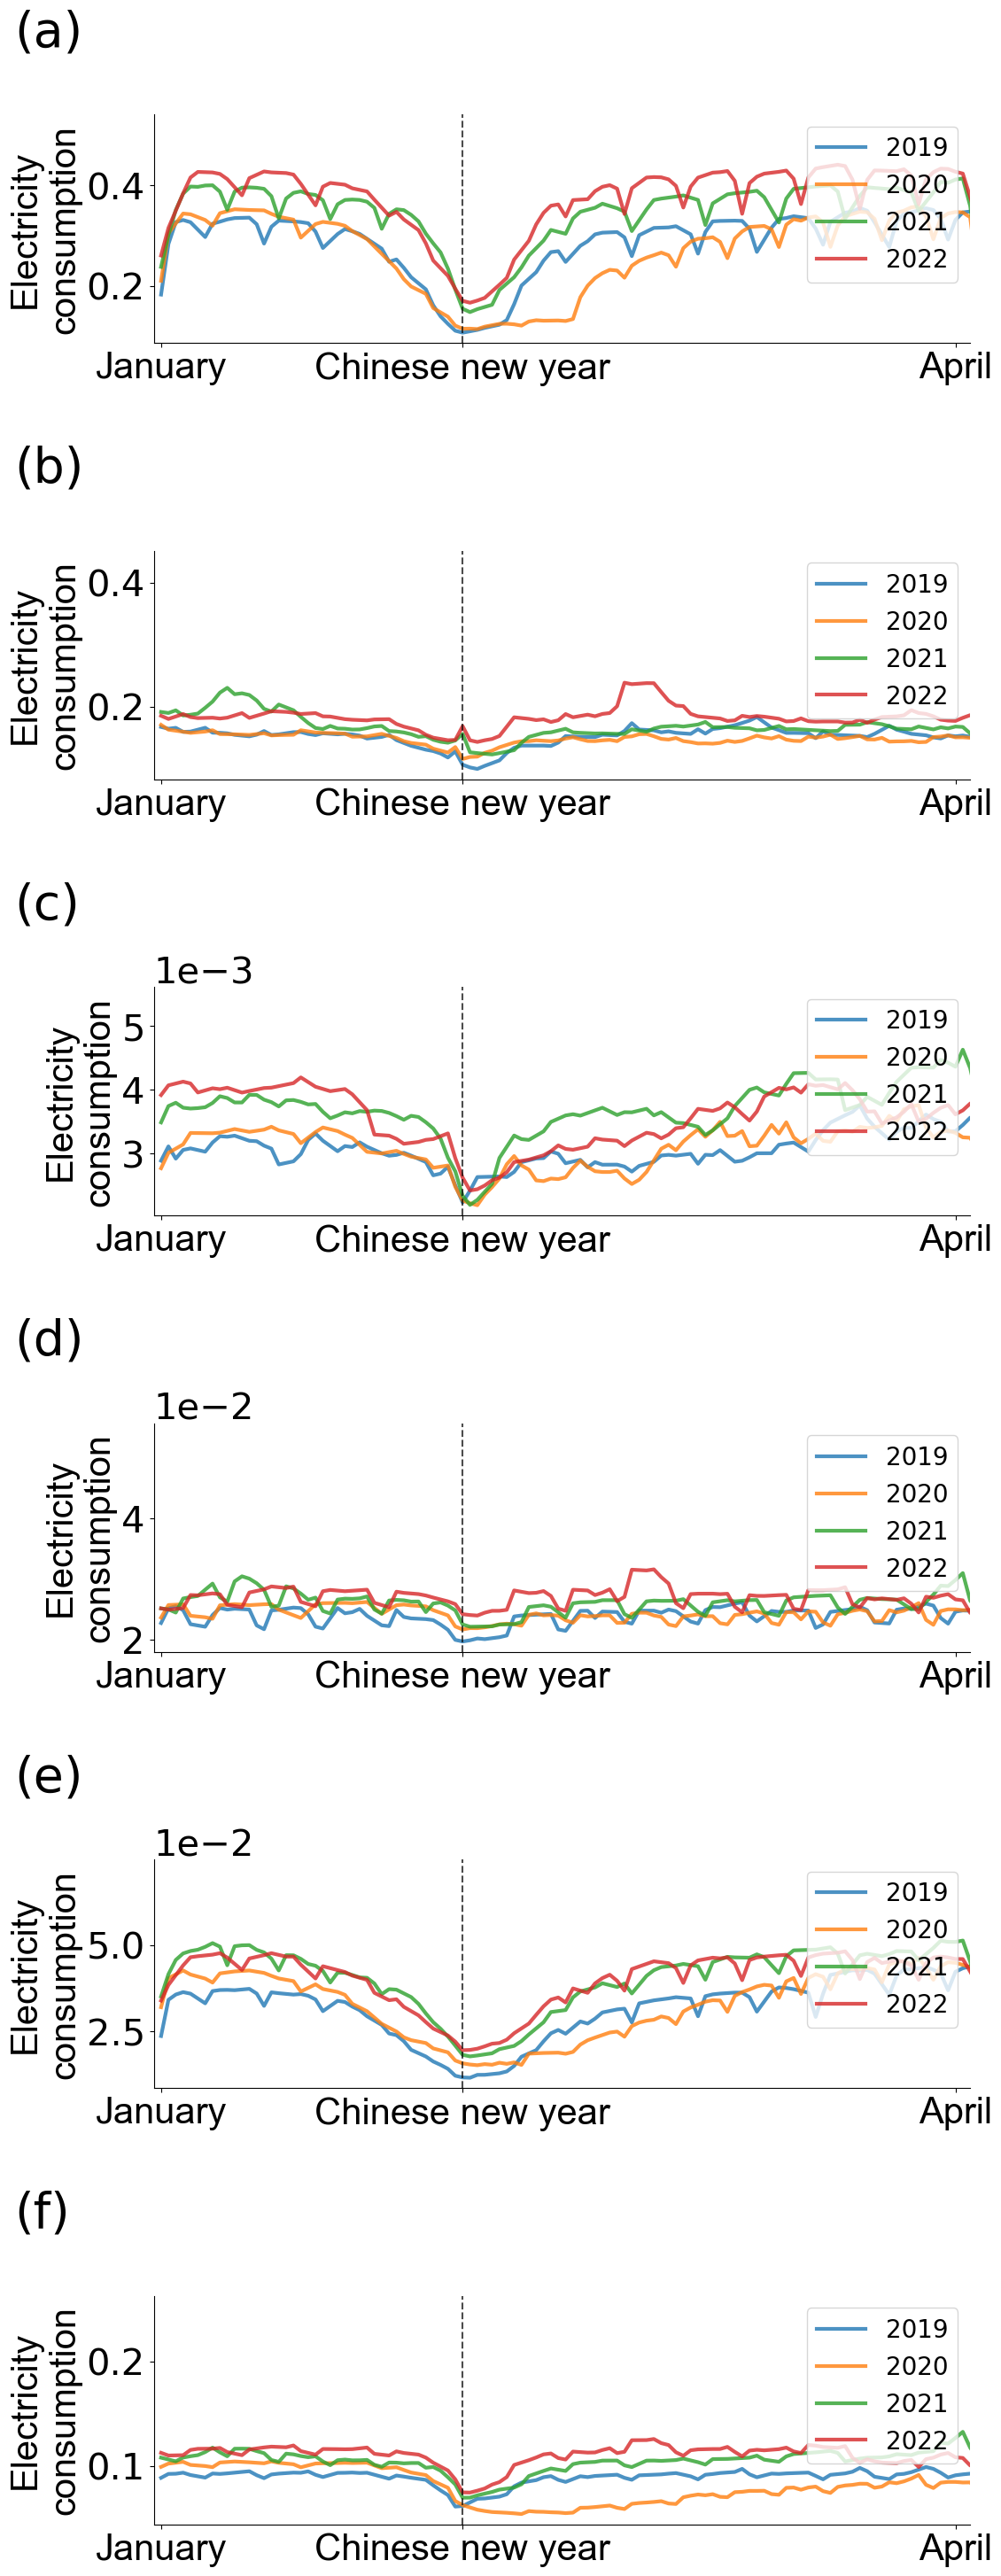

In [83]:
titles = 'a,b,c,d,e,f'.split(',')
titles = [f'({i})' for i in titles]
for city in cities:
    if city == '厦门':
    # data = pd.read_excel('./data/数据/实际数据/九地市分用电类别数据(整理版).xlsx', sheet_name=city)
        n_col = 2
        figsize=(20,15)
    else:
        n_col = 1
        figsize=(12, 30)
    fig, ax = plt.subplots(len(features)//n_col, n_col, figsize=figsize)
    ax = ax.reshape(-1, n_col)
    for ind, feature in enumerate(features):
        data1 = data[['日期', feature, '疫情']]
        data1.columns = ['timestamp', 'feature1', 'label']
        valid_raws = data1.index[~(data1.isna().iloc[:,-1] | data1.isna().iloc[:,1] | data1.isna().iloc[:,0])]
        data1 = data1.loc[valid_raws]
        data1.iloc[:,0] = data1.iloc[:,0].view('int64')
        train_data = data1.iloc[:,:2]
        gt = data1.iloc[:, [0,-1]]

        years = np.array([i.year for i in pd.to_datetime(data1.iloc[:,0])])
        ts1 = data1[years==2019]
        ts2 = data1[years==2020]
        ts3 = data1[years==2021]
        ts4 = data1[years==2022]

        tss_new = align_mulyrs(
            [ts1, ts2,ts3,ts4],
            [
               ['2019-01-01', sf1, '2019-04-01', '2019-12-31'],
               ['2020-01-01', sf2, '2020-04-01', '2020-12-31'],
               ['2021-01-01', sf3, '2021-04-01', '2021-12-31'], 
               ['2022-01-01', sf4, '2022-04-01', '2022-12-31']
            ]
        )
        label_days = pd.to_datetime(ts2[ts2.label==1].timestamp)
        starts = [label_days.iloc[0]]
        ends = [label_days.iloc[0]]
        for i in range(label_days.shape[0]-1):
            if label_days.iloc[i]+np.timedelta64(1,'D') == label_days.iloc[i+1]:
                ends[-1] += np.timedelta64(1, 'D')
            else:
                starts.append(label_days.iloc[i])
                ends.append(label_days.iloc[i])

        yrs = '2019,2020,2021,2022'.split(',')
        clists = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
        for i, t_rescale in enumerate(tss_new):
            ax[ind//n_col][ind%n_col].plot(t_rescale['feature1'].to_numpy(), label=yrs[i], c=clists[i], alpha=0.8, lw=3)
            # ax.plot(t_rescale['feature1'].to_numpy()+0.5-t_rescale['feature1'].to_numpy().mean(), '.-', label=yrs[i])
            label_days = pd.to_datetime(t_rescale[t_rescale.label==1].timestamp)
        ax[ind//n_col][ind%n_col].legend(fontsize=20, loc=1)
        feature = re.sub(' .+\.', '',feature)
        # ax[ind//2][ind%2].set_title(feature_eng[feature])
        # ax[ind//2][ind%2].set_title(titles[ind], loc='left')
        special_days = ['2019-01-01', sf1, '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', ]
        x_ticks = tss_new[0].index[np.isin(tss_new[0]['timestamp'], pd.to_datetime(special_days).view('int64'))].to_numpy()
        # x_ticklabels = [i[5:] for i in special_days]
        x_ticklabels = 'January，Chinese new year，April，五月，六月，七月，八月，九月，十月，十一月，十二月'.split('，')
        # x_ticklabels[1] = 'Chinese NY'
        ylims = ax[ind//n_col][ind%n_col].get_ylim()
        ax[ind//n_col][ind%n_col].vlines(x_ticks[1], *ylims, ls='--', color='k', alpha=0.7)
        ax[ind//n_col][ind%n_col].set_ylim(ylims)
        ax[ind//n_col][ind%n_col].set_xticks(ticks=x_ticks, labels=x_ticklabels,font='Arial')
        ax[ind//n_col][ind%n_col].set_ylabel('Electricity\nconsumption',font='Arial')
        ax[ind//n_col][ind%n_col].spines['right'].set_visible(False)
        ax[ind//n_col][ind%n_col].spines['top'].set_visible(False)
        ax[ind//n_col][ind%n_col].set_xlim(-1, 110)
        ylim = ax[ind//n_col][ind%n_col].get_ylim()
        ax[ind//n_col][ind%n_col].text(-20, ylim[1]+np.diff(ylim)[0]*0.3, titles[ind], fontsize=40)
        ax[ind//n_col][ind%n_col].ticklabel_format(style='sci', scilimits=(-2,1), axis='y')
    # plt.subplots_adjust(hspace=0.5)
    if city == '厦门':
        plt.suptitle('Lunar Calender Alignment')
    plt.tight_layout()
    # break

    # plt.savefig(f'./results/ENG_AlignTS_{city}.png',dpi=300)
    plt.savefig(f'./results/ENG_AlignTS_{city}.pdf')

In [ ]:
city, feature = '厦门', 'all'
os.system(f'python main.py --anormly_ratio 1 --num_epochs 10  --batch_size 64  --mode train --dataset PSM  --data_path data/{city}_{feature} --input_c 10 --output_c 10')
os.system(f'python main.py --anormly_ratio 1 --num_epochs 10  --batch_size 64  --mode test --dataset PSM  --data_path data/{city}_{feature} --input_c 10 --output_c 10 --win_size 1')

0

In [292]:
cities

['三明', '南平', '厦门', '宁德', '泉州', '漳州', '福州', '莆田', '龙岩']

In [293]:
for city in cities:
    if city == '厦门':
        continue
    print(city)
    for feature in features:
        os.system(f'python main.py --anormly_ratio 1 --num_epochs 10  --batch_size 64  --mode train --dataset {city}_{feature}  --data_path data/{city}_{feature} --input_c 1 --output_c 1')
        os.system(f'python main.py --anormly_ratio 1 --num_epochs 10  --batch_size 64  --mode test --dataset {city}_{feature}  --data_path data/{city}_{feature} --input_c 1 --output_c 1 --win_size 1')

三明
南平
宁德
泉州
漳州
福州
莆田
龙岩


In [237]:
for city in cities:
    feature = 'all'
    os.system(f'python main.py --anormly_ratio 1 --num_epochs 10  --batch_size 64  --mode train --dataset {city}_{feature}  --data_path data/{city}_{feature} --input_c 10 --output_c 10')
    os.system(f'python main.py --anormly_ratio 1 --num_epochs 10  --batch_size 64  --mode test --dataset {city}_{feature}  --data_path data/{city}_{feature} --input_c 10 --output_c 10 --win_size 1')